In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('events.csv')
datos_conversion_r = datos[datos["event"] == "conversion"].drop_duplicates("person")
datos_conversion = datos_conversion_r[["timestamp","person","model"]].dropna()
datos_conversion.head()

C:\Users\Santi\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,person,model
220,2018-03-20 17:46:12,00204059,Motorola Moto X2
2282,2018-04-26 22:28:53,00c13dee,Samsung Galaxy Core Plus Duos TV
2547,2018-06-10 14:37:50,00fdbb4b,Samsung Galaxy S6 Flat
4245,2018-03-16 13:50:25,0146a9df,iPhone 5s
6985,2018-02-09 22:07:07,01db2fe6,Samsung Galaxy J5


In [3]:
datos_viewed_product_r = datos[datos["event"] == "viewed product"].drop_duplicates()
datos_viewed_product = datos_viewed_product_r[["timestamp","person","model"]].drop_duplicates(subset=["person","model"], keep='first')

gente_compro = datos_conversion[["person","timestamp"]].dropna()
gente_compro.columns = ["person","timestamp2"]

vistos_gente_compro = pd.merge(gente_compro, datos_viewed_product, how='left', on='person')
vistos_gente_compro.head()

,person,timestamp2,timestamp,model
0,00204059,2018-03-20 17:46:12,2018-01-31 17:01:46,iPhone 5s
1,00204059,2018-03-20 17:46:12,2018-01-31 17:03:56,iPhone 5c
2,00204059,2018-03-20 17:46:12,2018-02-01 23:16:46,Motorola Moto G3 4G
3,00204059,2018-03-20 17:46:12,2018-02-02 17:39:39,Motorola Moto G4 Play DTV
4,00204059,2018-03-20 17:46:12,2018-02-06 02:31:44,Asus Zenfone 2


In [4]:
vistos_gente_compro['timestamp'] = pd.to_datetime(vistos_gente_compro['timestamp'])
vistos_gente_compro['timestamp2'] = pd.to_datetime(vistos_gente_compro['timestamp2'])

vistos_gente_compro["tiempo en comprar"] = pd.to_numeric(vistos_gente_compro["timestamp2"] - vistos_gente_compro["timestamp"])
vistos_gente_compro_=vistos_gente_compro.index[vistos_gente_compro["tiempo en comprar"] > 0]
vistos_gente_compro_antes = vistos_gente_compro.loc[vistos_gente_compro_]

In [5]:
vistos = vistos_gente_compro_antes.groupby('person').agg({'timestamp':'count','timestamp2':'count'})
vistos.head()

,timestamp,timestamp2
person,,
00204059,8,8
00c13dee,6,6
0146a9df,1,1
01db2fe6,3,3
03bdcd81,4,4


In [19]:
datos_4_bins = vistos.groupby(pd.cut(vistos["timestamp"], 4, labels = ('(0 - 1)','(2 - 13)', '(14 - 40)','(41 - 67)'))).count()
datos_4_bins = datos_4_bins.drop(["timestamp2"],axis='columns')
datos_4_bins

,timestamp
timestamp,
(0 - 1),454
(2 - 13),51
(14 - 40),6
(41 - 67),4


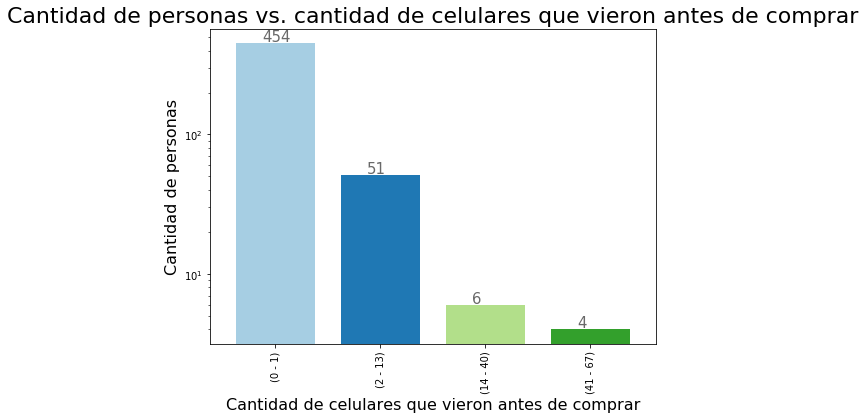

In [34]:
x = np.logspace(0, 5, num=21)
y = (np.sin(1.e-2*(x[:-1]-20))+3)**10

p = datos_4_bins.plot(kind='bar',    # Plot a bar chart
        legend=False,    # Turn the Legend off
        width=0.75,      # Set bar width as 75% of space available
        figsize=(8,5.8),  # Set size of plot in inches
        color=[plt.cm.Paired(np.arange(len(vistos)))],
        logy=True)

p.set_xlabel("Cantidad de celulares que vieron antes de comprar", size = 16)
p.set_ylabel("Cantidad de personas", size = 16)
p.set_title("Cantidad de personas vs. cantidad de celulares que vieron antes de comprar", size = 22)

for i in p.patches:
    # get_width pulls left or right; get_y pushes up or down
    p.text (i.get_x()+.25, (103*i.get_height()/100), i.get_height(), fontsize=15, color='dimgrey')
